### 2021_10_14_1

## 결정트리(decision tree)

### 학습 내용
* 01 의사결정트리 모델을 생성해 보기
* 02 트리의 특성 중요도 알아보고 시각화 해보기
* 03 의사결정트리의 범주형 / 연속형 적용해보기
* 04 과적합을 해결해 보기

## 의사결정트리 기본
* decision tree는 classification(분류)와 regression(회귀) 문제에 널리 사용하는 모델이다.
* 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습한다.

In [1]:
# colab mglearn 설치 필요
!pip install mglearn

     |████████████████████████████████| 540 kB 7.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=956667e7b9f8213b1491d215832e66cd371f2437dce6294b0269939653300e43
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import matplotlib.pyplot as plt
import mglearn

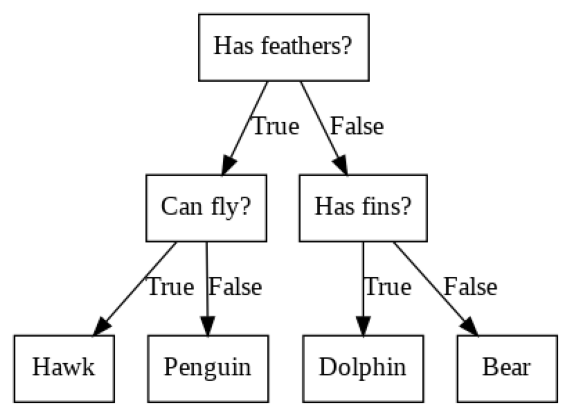

In [3]:
plt.figure(figsize = (10, 10))
mglearn.plots.plot_animal_tree()

* 트리에 사용되는 세 개의 feature가 있음.
	* 'Has feathers?'(날개가 있나요?)
	* 'Can fly?'(날 수 있나요?)
	* 'Has fins?'(지느러미가 있나요?)
* 이 머신러닝 문제는 네 개의 클래스로 구분하는 모델을 생성
	* 네 개의 클래스 - 매, 펭귄, 돌고래, 곰
* 노드 종류
	* 맨 위의 노드 - Root Node(루트 노드)
	* 맨 마지막 노드 - Leaf Node(리프 노드)
	* target가 하나로만 이루어진 Leaf Node(리프 노드) - Pure Node(순수 노드)
* edge(에지)는 질문의 답과 다음 질문을 연결한다.
* 노드 분기(각 노드)
	* 범주형은 데이터를 구분하는 질문을 통해 나눈다.
	* 연속형은 특성 i가 a보다 큰가?의 질문으로 나눈다.

In [4]:
# knn - 회귀, 분류
# 선형형 회귀 - 회귀
#    라소회귀, 리지(Ridge)회귀
# 의사결정트리

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [7]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

# test_size : train 데이터와 test 데이터의 비율
X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y, 
                                                    stratify = cancer.target,
                                                    test_size = 0.3,
                                                    random_state = 77)

model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918


### 03 의사 결정 트리 복잡도 변경
* 결정 트리의 깊이를 제한하지 않으면 트리는 무작정 깊어지고 복잡해 질 수 있다.
* 첫번째는 트리가 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것이다.
  * max_depth, max_leaf_nodes, min_samples_leaf 등 사용
  * max_depth를 사용

In [8]:
for i in range(1, 7, 1) :
    tree = DecisionTreeClassifier(max_depth = i, random_state = 0)
    tree.fit(X_train, y_train)
    print(f"max_depth : {i}")
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

max_depth : 1
훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.883
max_depth : 2
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912
max_depth : 3
훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.906
max_depth : 4
훈련 세트 정확도 : 0.985
테스트 세트 정확도 : 0.906
max_depth : 5
훈련 세트 정확도 : 0.992
테스트 세트 정확도 : 0.889
max_depth : 6
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.901


In [9]:
tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)
tree.fit(X_train, y_train)
print(f"max_depth : {2}")
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

max_depth : 2
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912


### 04 유방암 데이터 셋을 이용한 모델 구축 및 시각화

In [10]:
model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="tree.dot", 
                class_names=['악성', '양성'],
                feature_names = cancer.feature_names, 
                impurity = False,
                filled=True)       # color 

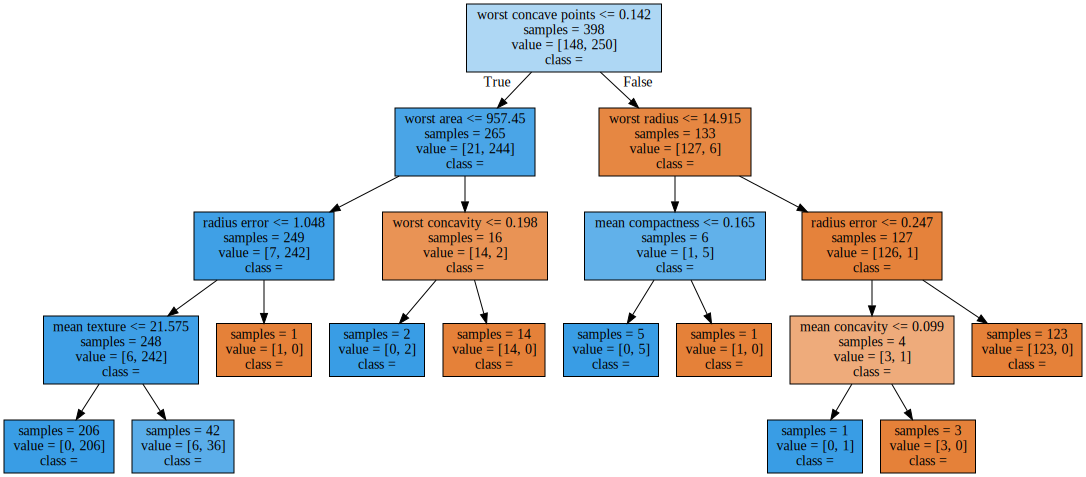

In [12]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

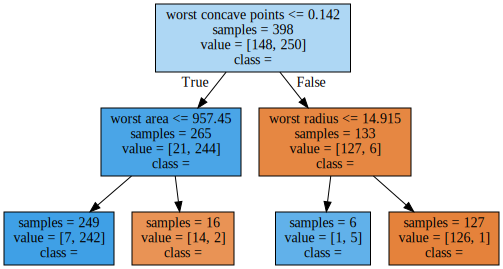

In [13]:
model = DecisionTreeClassifier(max_depth = 2, random_state = 0)
model.fit(X_train, y_train)

export_graphviz(model, out_file = "tree.dot", 
                class_names = ['악성', '양성'],
                feature_names = cancer.feature_names, 
                impurity = False,
                filled = True)       # color. 
                
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 05 트리의 특성 중요도
* 특성 중요도 : 0과 1 사이의 숫자
	* 0은 트리에서 전혀 사용되지 않음.
	* 1은 트리에서 완벽하게 타깃 클래스를 예측했다.
	* 특성 중요도의 전체 합은 1이다.
* 특성의 feature_importance_ 값이 낮다고 해서 특성이 유용하지 않다는 것은 아니다.
* 단지 트리가 그 특성을 선택하지 않았다는 것이다.

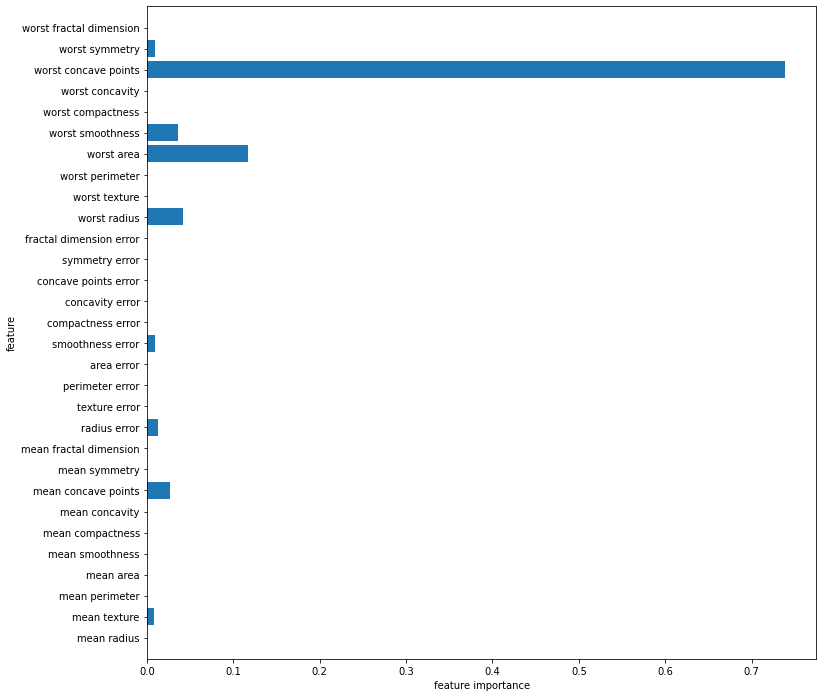

In [19]:
import numpy as np

model = DecisionTreeClassifier(max_depth = 6, random_state = 0)
model.fit(X_train, y_train)

def plot_feature_imp_cancer(model) :
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_             
    plt.barh(range(n_features), imp, align = "center")
    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plt.figure(figsize = (12, 12))
plot_feature_imp_cancer(model)

* worst_concave_points가 가장 중요한 특성으로 나타난다.
	* 첫번째 노드에서 두 클래스를 꽤 잘 나누고 있다.
* feature_importance_ 값이 낮다고 해서 특성이 유용하지 않다는 뜻이 아니다.

### 결정 트리의 장점
* 첫째, 만들어진 모델을 쉽게 시각화할 수 있어서, 비전문가도 이해하기 쉽다.
* 둘째, 데이터의 스케일에 구애받지 않는다.(정규화, 표준화 전처리 과정 필요 없다.)

### 결정 트리의 단점
* 사전 가지치기의 사용하지만 Overfitting(과대적합) 되는 경향이 있다.
* 리프 노드가 순수 노드가 될때까지 진행하면, 모델이 매우 복잡해지고 훈련 데이터의 과대적합(overfitting)이 된다. -> 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다.

### 트리모델의 모델 복잡도 조절 매개 변수
* max_depth : 트리의 깊이
  * max_depth = 4라면 연속된 질문의 옵션을 최대 4개로 제한
  * 트리 깊이를 제한하면 과대적합이 줄어든다.
  * 훈련 세트의 정확도는 떨어지지만 테스트 성능은 개선
* max_leaf_nodes : 최대 leaf 노드의 수
* min_samples_leaf : 노드가 분할하기 위한 잎노드의 최소 데이터 개수